# A/B Testing

In [1]:
import numpy as np
from datascience import *
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings('ignore')

The data below contains the following variables for 1,174 mother-baby pairs: the baby’s birth weight in ounces, the number of gestational days, the mother’s age in completed years, the mother’s height in inches, pregnancy weight in pounds, and whether or not the mother smoked during pregnancy.

In [2]:
baby = Table.read_table('baby.csv')

In [3]:
#calculating bmi to use as a screening variable in regard to health
bmi = (baby.column(4)*0.453592)/((baby.column(3)*0.0254)**2)

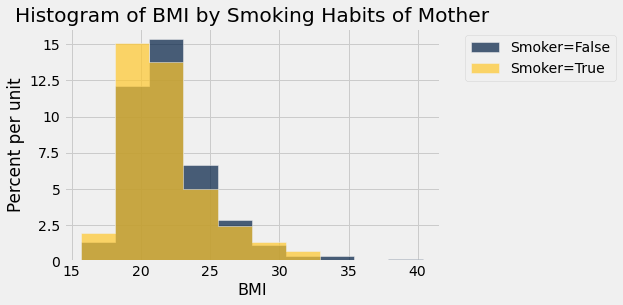

In [4]:
#visualize the data
smoke_bmi = Table().with_columns('Smoker', baby.column(5),
                                'BMI', bmi)
smoke_bmi.hist('BMI', group = 'Smoker')
plots.title('Histogram of BMI by Smoking Habits of Mother')
plots.show()

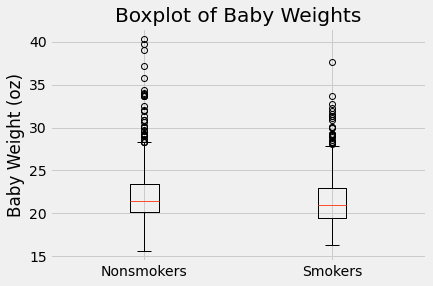

In [5]:
plots.boxplot([smoke_bmi.where('Smoker',False).column(1),smoke_bmi.where('Smoker',True).column(1)],
             labels=('Nonsmokers','Smokers'))
plots.title('Boxplot of Baby Weights')
plots.ylabel ('Baby Weight (oz)')
plots.show()

Smokers tend to have a lower BMI as showsn by the yellow histogram slightly more left than the blue. In the box plot, the smoker median is also lower than the nonsmoker median. The smoker IQR is also slightly smaller than the nonsmoker. 


### I want to investigate if the distributions of the BMI in mothers who smoke and mothers who do not smoke are the same. 

Test statistic: **The difference in BMI sample means** (between smokers and non-smokers).  

In [6]:
# the null distribution and the p-value
bmi_table = smoke_bmi.select(1)
diff = make_array()
labels = smoke_bmi.select(0)

for i in np.arange(500):
    shuffle_bmi = bmi_table.sample(with_replacement = False).column(0)
    og_and_shuf = labels.with_column('Shuffled BMI', shuffle_bmi)    
    mean_tbl = og_and_shuf.group(0, np.mean)
    difference = mean_tbl.column(1).item(0) - mean_tbl.column(1).item(1)
    diff = np.append(diff, difference)

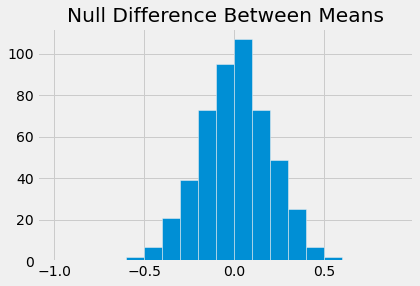

In [7]:
plots.hist(diff, bins = np.arange(-1,1,0.1))
plots.title("Null Difference Between Means")
plots.show()

In [8]:
mean_table = smoke_bmi.group('Smoker', np.mean)
obs_diff = mean_table.column(1).item(0) - mean_table.column(1).item(1)

pval = np.count_nonzero(diff > obs_diff)/len(diff)
pval

0.004

Test statistic: **The difference in BMI sample medians** (between smokers and non-smokers).  

In [9]:
# the null distribution and the p-value
bmi_table = smoke_bmi.select(1)
diff = make_array()
labels = smoke_bmi.select(0)

for i in np.arange(500):
    shuffle_bmi = bmi_table.sample(with_replacement = False).column(0)
    og_and_shuf = labels.with_column('Shuffled BMI', shuffle_bmi)    
    med_tbl = og_and_shuf.group(0, np.median)
    difference = med_tbl.column(1).item(0) - med_tbl.column(1).item(1)
    diff = np.append(diff, difference)

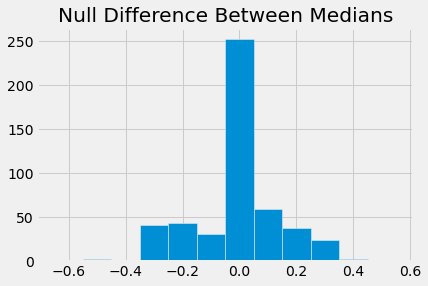

In [10]:
plots.hist(diff, bins = np.arange(-0.65,0.65,0.1))
plots.title("Null Difference Between Medians")
plots.show()

In [11]:
med_table = smoke_bmi.group('Smoker', np.median)
obs_diff = med_table.column(1).item(0) - med_table.column(1).item(1)

pval = np.count_nonzero(diff > obs_diff)/len(diff)
pval

0.006

Test statistic: **The difference in BMI sample IQRs** (between smokers and non-smokers).  

In [12]:
# the null distribution and the p-value
bmi_table = smoke_bmi.select(1)
diff = make_array()
labels = smoke_bmi.select(0)

def iqr (x):
    return np.quantile(x, .75) - np.quantile(x, .25)

for i in np.arange(500):
    shuffle_bmi = bmi_table.sample(with_replacement = False).column(0)
    og_and_shuf = labels.with_column('Shuffled BMI', shuffle_bmi)    
    iqr_tbl = og_and_shuf.group(0, iqr)
    difference = iqr_tbl.column(1).item(0) - iqr_tbl.column(1).item(1)
    diff = np.append(diff, difference)

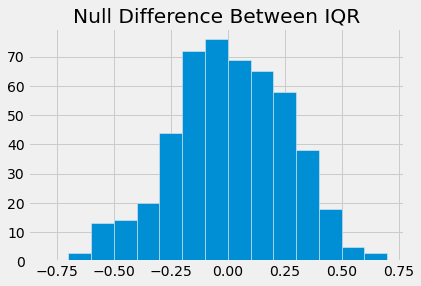

In [13]:
plots.hist(diff, bins = np.arange(-0.8,0.8,0.1))
plots.title("Null Difference Between IQR")
plots.show()

In [14]:
iqr_table = smoke_bmi.group('Smoker', iqr)
obs_diff = iqr_table.column(1).item(0) - iqr_table.column(1).item(1)
pval = np.count_nonzero(diff > obs_diff)/len(diff)
pval

0.764

Test statistic: **The difference in BMI sample SDs** (between smokers and non-smokers).  

In [15]:
# the null distribution and the p-value
bmi_table = smoke_bmi.select(1)
diff = make_array()
labels = smoke_bmi.select(0)

for i in np.arange(500):
    shuffle_bmi = bmi_table.sample(with_replacement = False).column(0)
    og_and_shuf = labels.with_column('Shuffled BMI', shuffle_bmi)    
    std_tbl = og_and_shuf.group(0, np.std)
    difference = std_tbl.column(1).item(0) - std_tbl.column(1).item(1)
    diff = np.append(diff, difference)

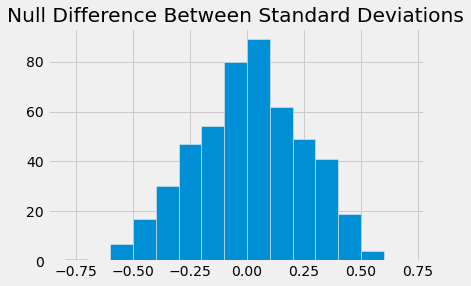

In [16]:
plots.hist(diff, bins = np.arange(-0.8,0.8,0.1))
plots.title("Null Difference Between Standard Deviations")
plots.show()

In [17]:
std_table = smoke_bmi.group('Smoker', np.std)
obs_diff = std_table.column(1).item(0) - std_table.column(1).item(1)
pval = np.count_nonzero(diff > obs_diff)/len(diff)
pval

0.234

The p-values for the mean and median were consistently very small/close to 0 or 0. This means there is not enough evidence to support the null hypothesis (distributions are the same), and we favor the alternate hypothesis that the two distributions are not the same. The p-value is very large for the IQR and also fairly large for the standard deviations (but smaller than IQR). Ultimately, we do not have enough evidence for the IQR and SD to reject the null, meaning the IQR and SD are the same for the two distributions. 